### Importing The REST Client:

To use the REST API, first add it to your PYTHONPATH and import it.

In [3]:
from streamsx import rest
import json

### The StreamsContext
To initialize a connection with SWS, the streams service which handles requests, initialize a *StreamsContext* object by passing it the username and password you would use to access the console, as well as the resources url of SWS. The latter can be obtained by invoking 'streamtool geturl --api' on the command line.

In [8]:
rc = rest.StreamsContext("streamsadmin", "passw0rd", "https://streamsqse.localdomain:8443/streams/rest/resources")

### Obtaining Domain, Instance, and View Objects
Each IBM Streams entity (a domain, instance, job, view, etc...) is represented by a corresponding Python class which contains the fields and functions of that entity. For example, we can see the fields of the domain class by retrieving a list of domains from the StreamsContext, and printing the first one to output.

We can see fields like the domain id, as well as resources the domain links to such as the list of hosts.

In [10]:
dom = rc.get_domains()[0]
print(dom)

{'activeServices': 'https://streamsqse.localdomain:8443/streams/rest/domains/StreamsDomain/activeservices',
 'activeVersion': <streamsx.rest.ActiveVersion object at 0x7f7dd697b6d8>,
 'creationTime': 1461356736540,
 'creationUser': 'streamsadmin',
 'hosts': 'https://streamsqse.localdomain:8443/streams/rest/domains/StreamsDomain/hosts',
 'id': 'StreamsDomain',
 'instances': 'https://streamsqse.localdomain:8443/streams/rest/instances',
 'resourceAllocations': 'https://streamsqse.localdomain:8443/streams/rest/domains/StreamsDomain/resourceallocations',
 'resourceTags': [<streamsx.rest.ResourceTag object at 0x7f7dd697bd30>,
 'resourceType': 'domain',
 'resources': 'https://streamsqse.localdomain:8443/streams/rest/domains/StreamsDomain/resources',
 'rest_connection': <streamsx.rest.StreamsRestConnection object at 0x7f7dd696f438>,
 'rest_self': 'https://streamsqse.localdomain:8443/streams/rest/domains/StreamsDomain',
 'restid': 'StreamsDomain',
 'self': 'https://streamsqse.localdomain:8443/st

### Retrieving Streams Resources
For each field that contains a *https* link to another resource, there is a corresponding function in the domain class to retrieve that resource. For example, the *instances* field above points to a resource containing the list of instances -- we can retrieve the list of instances by invoking *get_instances()* on the domain object:

In [11]:
instances = dom.get_instances()
print(instances)

### Obtaining Views From Instances
Each instance maintains a list of views within that instance. Similar to how the list of instances was retrieved, the list list of views can be obtained by calling *get_views()*

In [4]:
inst = instances[0]
view = inst.get_views()[0]

### View Items
Each view maintains a list of view-items (the tuples). The view-items list is updated and returned every time get_view_items is called. 

The types of the view-items is retrieved by invoking the *view.attributes()* method.

In [12]:
itms = view.get_view_items()
print(view.attributes)
print(len(itms))

[{'type': 'float64', 'name': 'my_num'}]
1000


### Graphing The Data
Lastly, if the the data passing through a view is numeric, it can be graphed using the *graph

<IPython.core.display.Javascript object>


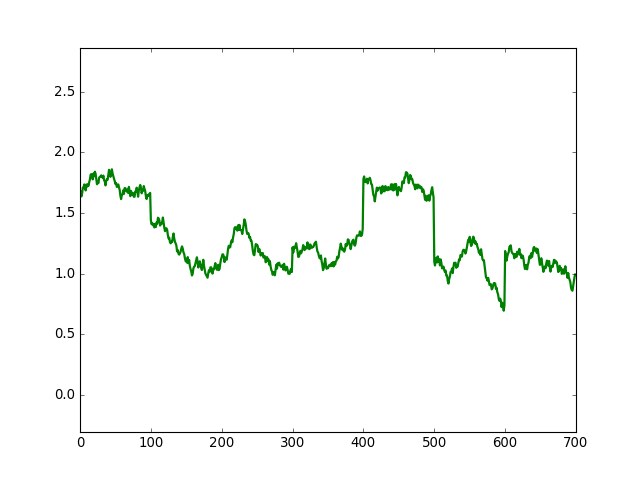

KeyboardInterrupt: 

In [6]:
%matplotlib inline
%matplotlib notebook
from streams_rest_utils import graph_every

graph_every(view, 1.0)